In [1]:
options(warn=-1)
install.packages("igraph", type="binary")
library(igraph)


The downloaded binary packages are in
	/var/folders/7b/p7dpjf7x7t395n88dm4php8r0000gn/T//RtmpkgdGm7/downloaded_packages



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



### Question 1. Random walk on Erdös-Rényi networks

#### 1.(a) Create an undirected random network with 1000 nodes, and the probability p for drawing an edge between any pair of nodes equal to 0.01. <br> 1.(b) Let a random walker start from a randomly selected node (noteleportation). We use t to denote the number of steps that the walker has taken. Measure the average distance (defined as the shortest path length) of the walker from his starting point at step t. Also, measure the standard deviation of this distance. Plot average distance v.s. t and standard deviation of this distance v.s. t. <br> 1.(c) Measure the degree distribution of the nodes reached at the end of the random walk. How does it compare to the degree distribution of graph?

In [8]:
ERnet = function(n, p=0.01, deg_dis_plot=FALSE){
    g <- erdos.renyi.game(n, p, directed=F)
    t_range = 1:100 * 2
    
    dis_avg = c()
    dis_std = c()
    degree.endPoint = c()
    
    g.components <- clusters(g)
    ix <- max(g.components$csize)
    g.giant <- induced.subgraph(g, which(g.components$membership == which.max(g.components$csize)))
    print(sprintf("diameter: %s", round(diameter(g.giant), digits=4)))
    
    for (t in seq_along(t_range)) {
        dis = c()
        for (i in 1:100) {
            walk.startPoint <- sample(1:n, 1)
            walk <- random_walk(g, start = walk.startPoint, steps=t_range[t])
            walk.endPoint <- tail(walk, n = 1)
            dis = c(dis, distances(g, v=walk.startPoint, to=walk.endPoint))
            degree.endPoint = c(degree.endPoint, degree(g, walk.endPoint))
        }
        dis_avg = c(dis_avg, mean(dis))
        dis_std = c(dis_std, sd(dis))
    }
    
    par(mfrow = c(2, 2))
    options(repr.plot.width=7, repr.plot.height=8)
    plot(t_range, dis_avg, xlab="step", ylab="distance avg", main="avg dis v.s. t")
    plot(t_range, dis_std, xlab="step", ylab="distance sd", main="sd v.s. t")
    if (deg_dis_plot) {
        h = hist(degree.endPoint, breaks=seq(min(degree.endPoint)-0.5, max(degree.endPoint)+0.5, by=1), plot=FALSE)
        plot(degree.distribution(g), xlab="Degree",ylab="Frequency", col="blue", ylim=c(0,15)*0.01, xlim=c(0,20))
        par(new=TRUE)
        plot(h$mids, h$density, xlab="Degree",ylab="Frequency", ylim=c(0,15)*0.01, xlim=c(0,20), col="red", pch="*")
        legend(0, 0.15, legend=c("deg dis", "endnode"), col=c("blue", "red"),lty=c(1,2), ncol=1, cex=0.6)
    }
}

[1] "diameter: 6"


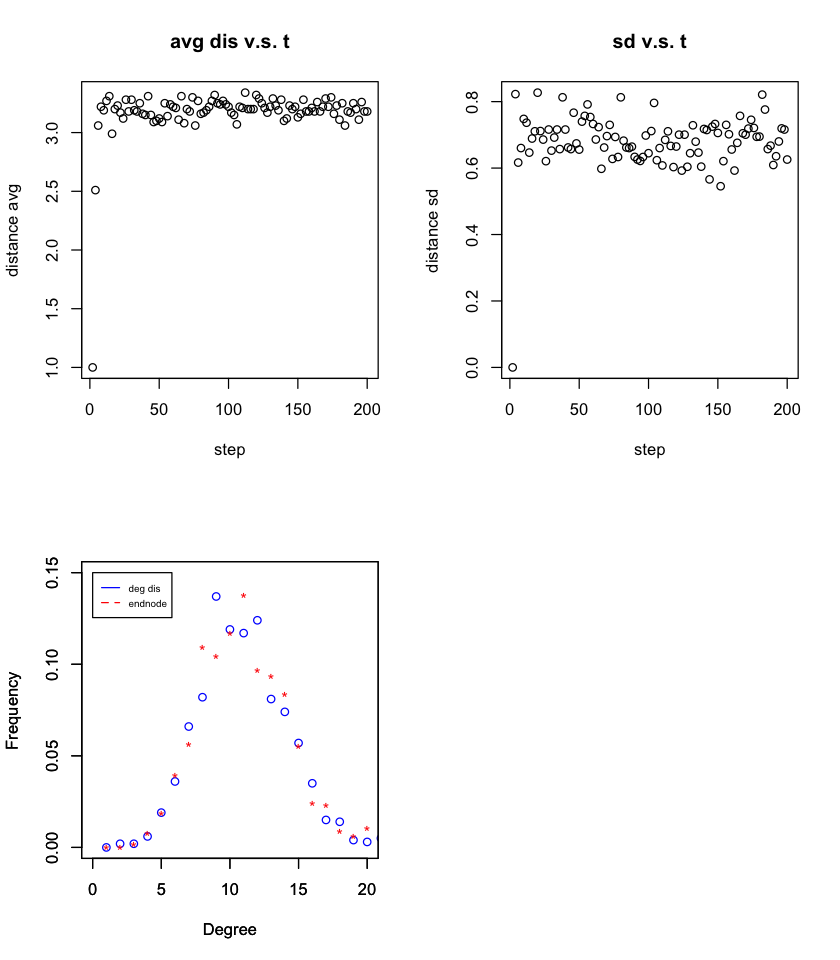

In [9]:
ERnet(1000, deg_dis_plot=TRUE)

#### 1.(d) Repeat (b) for undirected random networks with 100 and 10000 nodes. Compare the results and explain qualitatively. Does the diameter of the network play a role?

[1] "diameter: 11"


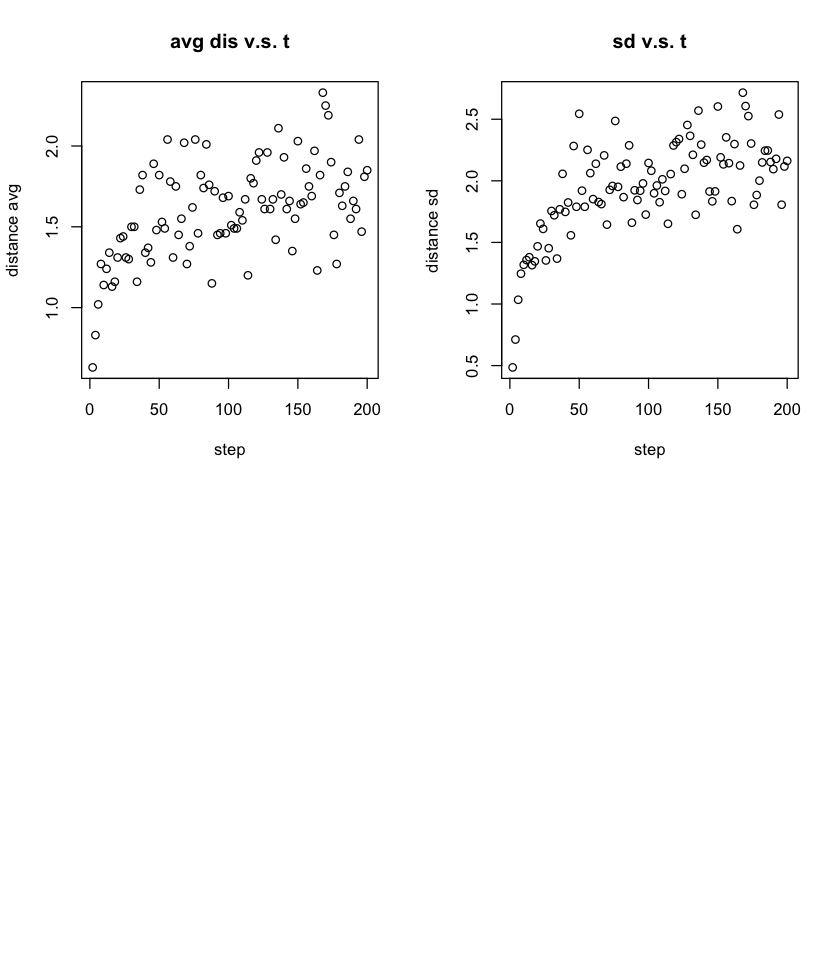

In [55]:
ERnet(100)

[1] "diameter: 3"


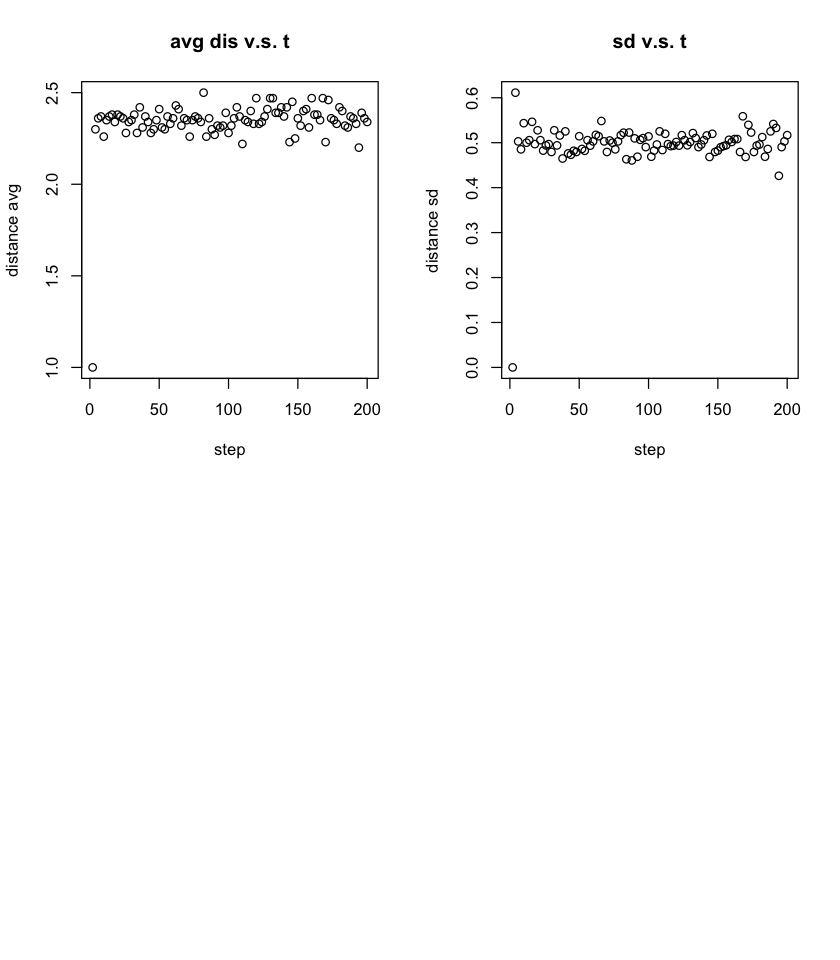

In [56]:
ERnet(10000)

### Question 2. Random walk on networks with fat-tailed degree distribution

#### 2.(a) Generate an undirected preferential attachment network with 1000 nodes, where each new node attaches to m = 1 old nodes. <br> 2.(b) Let a random walker start from a randomly selected node. Measure and  plot average distance v.s. t and standard deviation of this distance v.s. t. <br> 2.(c) Measure the degree distribution of the nodes reached at the end of the random walk on this network. How does it compare with the degree distribution of the graph? 

In [12]:
PAnet = function(n, m=1, deg_dis_plot=FALSE){
    g <- barabasi.game(n, m=m, directed=F)
    t_range = 1:100 * 3
    
    dis_avg = c()
    dis_std = c()
    degree.endPoint = c()

    g.components <- clusters(g)
    ix <- max(g.components$csize)
    g.giant <- induced.subgraph(g, which(g.components$membership == which.max(g.components$csize)))
    print(sprintf("diameter: %s", round(diameter(g.giant), digits=4)))
    
    for (t in seq_along(t_range)) {
        dis = c()
        for (i in 1:100) {
            walk.startPoint <- sample(1:n, 1)
            walk <- random_walk(g, start = walk.startPoint, steps=t_range[t])
            walk.endPoint <- tail(walk, n = 1)
            dis = c(dis, distances(g, v=walk.startPoint, to=walk.endPoint))
            degree.endPoint = c(degree.endPoint, degree(g, walk.endPoint))
        }
        dis_avg = c(dis_avg, mean(dis))
        dis_std = c(dis_std, sd(dis))
    }

    par(mfrow = c(2, 2))
    options(repr.plot.width=7, repr.plot.height=8)
    plot(t_range, dis_avg, xlab="step", ylab="distance avg", main="avg dis v.s. t")
    plot(t_range, dis_std, xlab="step", ylab="distance sd", main="sd v.s. t")
    if (deg_dis_plot) {
        h = hist(degree.endPoint, breaks=seq(min(degree.endPoint)-0.5, max(degree.endPoint)+0.5, by=1), plot=FALSE)
        plot(degree.distribution(g), xlab="Degree",ylab="Frequency", col="blue", ylim=c(0,15)*0.01, xlim=c(0,20))
        par(new=TRUE)
        plot(h$mids, h$density, xlab="Degree",ylab="Frequency", ylim=c(0,15)*0.01, xlim=c(0,20), col="red", pch="*")
        legend(15, 0.15, legend=c("deg dis", "endnode"), col=c("blue", "red"),lty=c(1,2), ncol=1, cex=0.6)
    }
}

[1] "diameter: 19"


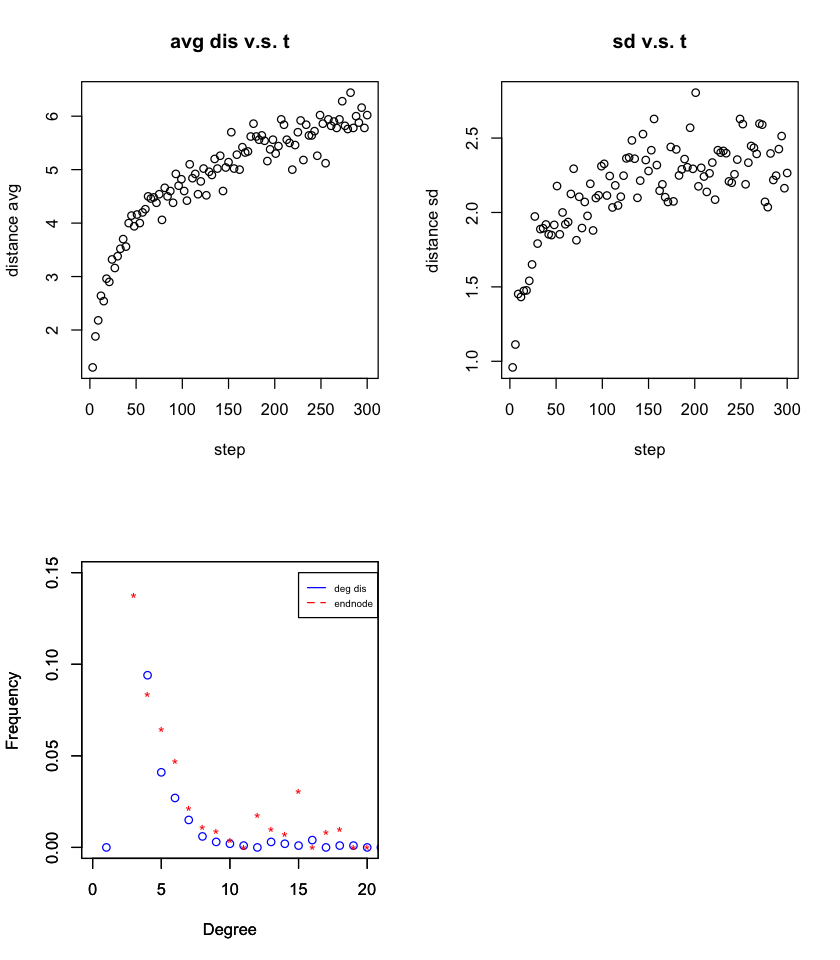

In [13]:
PAnet(1000, deg_dis_plot=TRUE)

#### 2.(d) Repeat (b) for preferential attachment networks with 100 and 10000 nodes, and m = 1. Compare the results and explain qualitatively. Does the diameter of the network play a role?

[1] "diameter: 15"


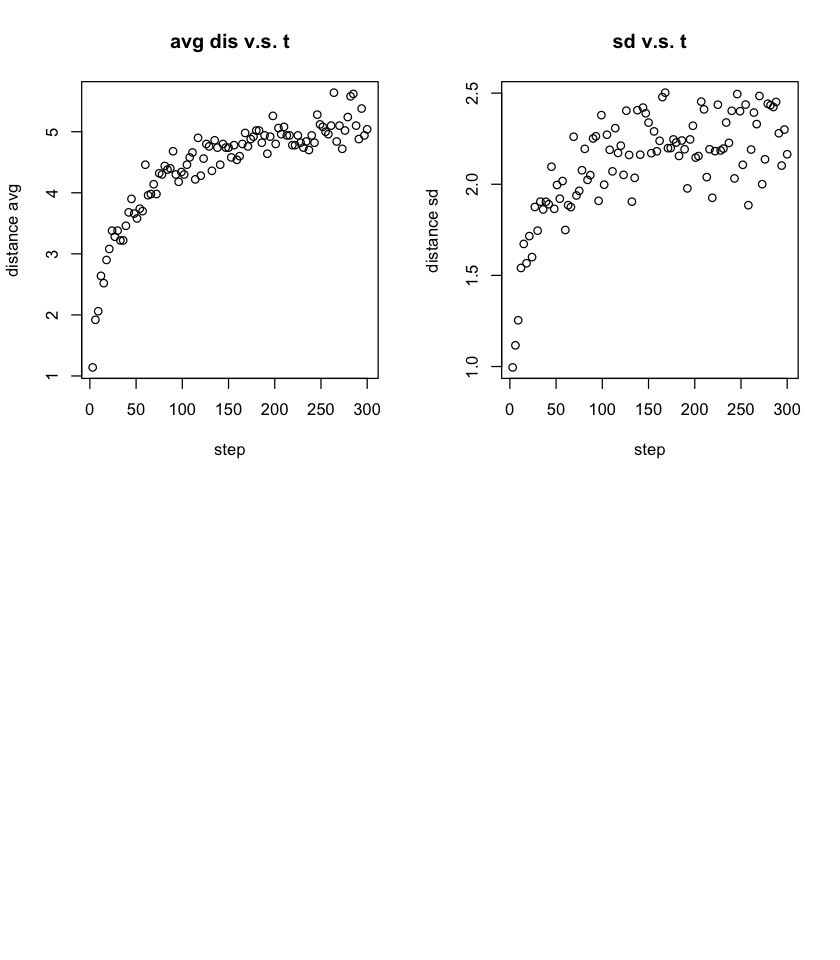

In [59]:
PAnet(100)

[1] "diameter: 29"


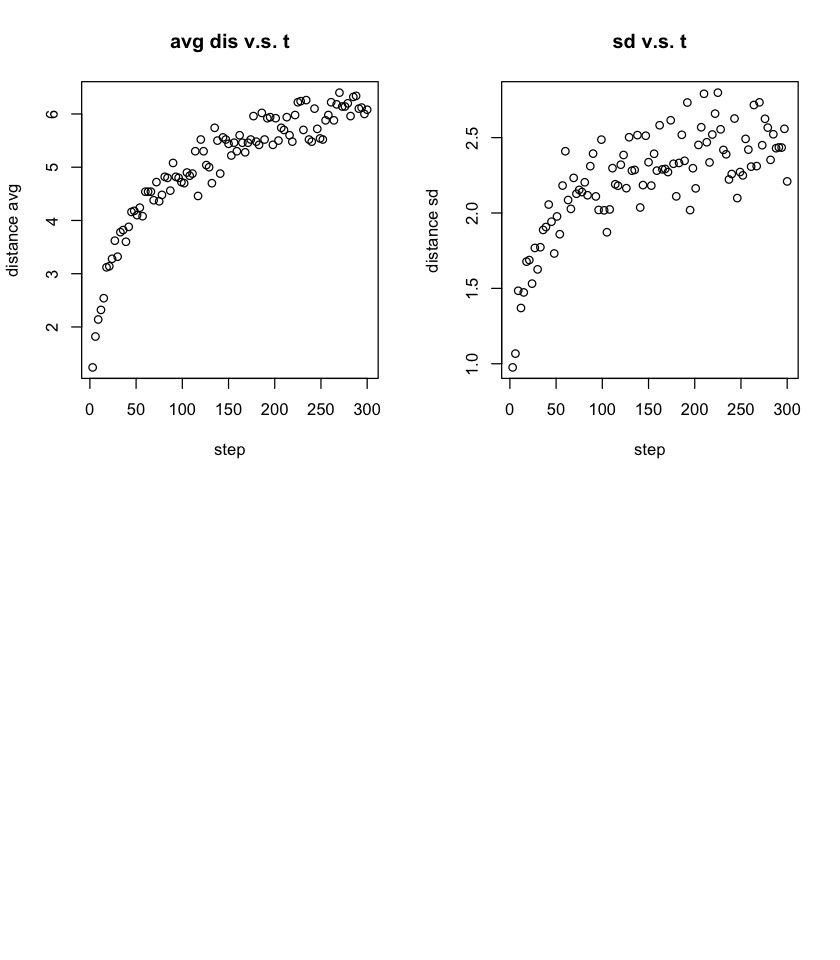

In [60]:
PAnet(10000)